# Assignment 05

Erik Strand <br> 17 February 2021 <br>
## In this assignment we will review Principal Component Analysis (PCA).
    
__Please submit a python script and markdown using Jupyter notebook (.ipynb file) with your submission. File name should be "Lastname_Firstname_assignment06.ipynb". Also provide step-by-step code for partial credits and do not forget to run your code before submitting.__

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer 

# 1. Reducing feature dimensions to 3D
For this task, we will use the breast cancer dataset provided by Sklearn.

In [2]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

### (1) Standardize features using StandardScalar

In [3]:
scaler = StandardScaler().fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

### (2) How many dimensions in the data original features?

In [4]:
print("Data originally has", X_scaled.shape[1], "dimensions.")

Data originally has 30 dimensions.


### (3) Using sklearn PCA, reduce the dimension of the data into 3-dimensional space
After this process, you should print
* Principal components (eigenvectors)
* Transformed (projected) data onto the three components (3D)
* Original shape of data
* Reduced shape of data

In [5]:
pca = PCA(n_components = 3).fit(X_scaled)

print("Principal components (eigenvector):\n", pca.components_)

X_pca = pca.transform(X_scaled) 
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))

Principal components (eigenvector):
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.23271589  0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796412 -0.00825723  0.14188335  0.27533947]
 [-0.00853125  0.06454992 -0.00931423  0.02869953 -0.10429199 -0.07409156
   0.00273389 -0.02556349 -0.04023993 -0.022574    0.26848138  0.37463366
   0.26664538  0.21600651  0.30883903  0.15477962  0.17646372  0.22465759


### (4) Explain about variance explained via principal components

In [6]:
print("Total variance of the data (original 30D :", np.sum(np.var(X_scaled,axis=0)))
print("Variance explained via the first three components:\n" , pca.explained_variance_)
print("Variance explained via the first three components (ratio):\n", pca.explained_variance_ratio_)

Total variance of the data (original 30D : 30.000000000000004
Variance explained via the first three components:
 [13.30499079  5.7013746   2.82291016]
Variance explained via the first three components (ratio):
 [0.44272026 0.18971182 0.09393163]


The first three principal components explain about 72% of the data's overall variance. 

### (5) Plot the three principal components and the projected data points using different mark colors based on the target
* ['target'] is the two classes of the breast cancer (0=malignant, 1=benign)
* Please refer below to create a 3D scatter plot

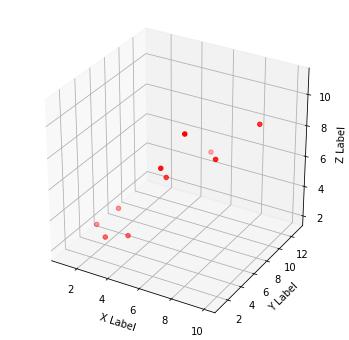

In [7]:
# How to create 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

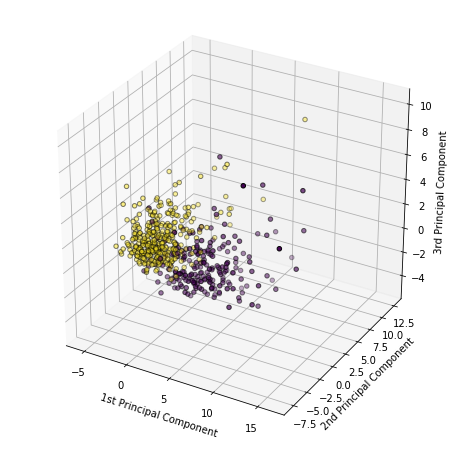

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cancer.target, edgecolor = 'k', marker = 'o')

ax.set_xlabel('1st Principal Component')
ax.set_ylabel('2nd Principal Component')
ax.set_zlabel('3rd Principal Component')

plt.show()

### (6) Explain about the 3D scatter plot. Can the projected (reduced) features represent the most valuable parts of all of the original variables?

Yes, these three features can represent most of the valuable parts of the original variables. We can see in this 3D projection that the target classes are almost completely separated based on these three components. This indicates that these are an effective way of breaking down the original data without losing the valuable information. 

# 2. Sparse PCA
In this problem you'll use Sparse PCA on a (subset of a) publicly available community-level dataset with a large-ish number of real-valued features related to socioeconomic and crime statistics. See here for more details on the dataset: http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

In [48]:
from sklearn.decomposition import SparsePCA

### (1) Load data and create a column to indicate whether a community has above or below average violent crime levels
    filename: 'communities.csv'

In [50]:
data = pd.read_csv('../data/communities.csv')
print (data.shape)

data['ViolentCrimesPerPop_binary']=data['ViolentCrimesPerPop']>np.mean(data['ViolentCrimesPerPop'])                                                                    
data = data.astype(float)

values = data.values
print("Features:\n",data.columns.values[0:25])
print("\nPrediction target:",data.columns.values[25:27])

data.head()

(1994, 26)
Features:
 ['population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctAsian'
 'racePctHisp' 'agePct12t21' 'agePct12t29' 'agePct16t24' 'agePct65up'
 'numbUrban' 'pctUrban' 'medIncome' 'pctWWage' 'pctWFarmSelf' 'pctWInvInc'
 'pctWSocSec' 'pctWPubAsst' 'pctWRetire' 'medFamInc' 'perCapInc'
 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap']

Prediction target: ['ViolentCrimesPerPop' 'ViolentCrimesPerPop_binary']


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,ViolentCrimesPerPop,ViolentCrimesPerPop_binary
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.20,0.0
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.67,1.0
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.43,1.0
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.12,0.0
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.03,0.0


### (2) Using Sparse PCA, reduce the data dimensions to 2D
As you continue to lower alpha you should eventually get to a point where the two leading (sparse) principal components are both non-trivial. Find this alpha and print the first and second principal components (eigenvectors).

In [63]:
# SparsePCA with alpha=6, highest for which pca's are non-trivial
spca = SparsePCA(n_components=2,alpha=6)
X_spca = spca.fit_transform(values[:,0:25])
print("*********SparsePCA with alpha=6*************")
print("Leading principal component:\n", spca.components_)
print("First non-zero feature:",data.columns[0:25][spca.components_[0]!=0])

*********SparsePCA with alpha=6*************
Leading principal component:
 [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
  -0.58299398  0.          0.         -0.14781075  0.          0.28248975
   0.         -0.52710974 -0.429005   -0.31077254  0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]]
First non-zero feature: Index(['medIncome', 'pctWInvInc', 'pctWPubAsst', 'medFamInc', 'perCapInc',
       'whitePerCap'],
      dtype='object')


I used an alpha of 6 to reduce the data to as few dimensions as possible without having trivial principal components. At an alpha of 7, there are no non-trivial PCAs; with an alpha of 6, there are six such PCAs. 

### (3) Reduce the data dimensions to 2D, using regular PCA

In [64]:
scaler = StandardScaler().fit(data) 
X_scaled = scaler.transform(data) 
pca = PCA(n_components=2).fit(X_scaled[:,0:25])
X_pca = pca.transform(X_scaled[:,0:25]) 
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (1994, 27)
Reduced shape: (1994, 2)


### (4) Plot the data projected onto the two leading (sparse) principal components and do the same thing for regular PCA. 


* Color each datapoint according to the column that you created above about whether a community has above or below average violent crime levels.

Text(0, 0.5, 'Second principal component')

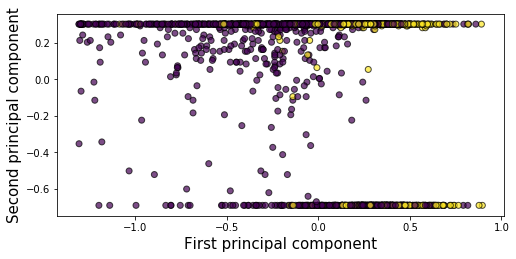

In [65]:
plt.figure(figsize=(8, 8)) 
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=data.ViolentCrimesPerPop_binary, edgecolors='k', alpha=0.7) 
plt.gca().set_aspect("equal") 
plt.xlabel("First principal component", fontsize=15) 
plt.ylabel("Second principal component",fontsize=15)

Text(0, 0.5, 'Second principal component')

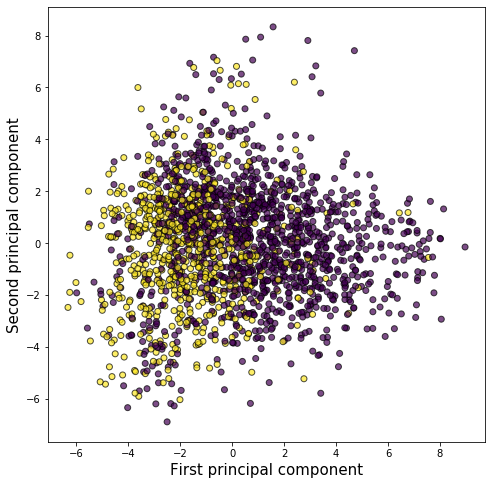

In [66]:
plt.figure(figsize=(8, 8)) 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.ViolentCrimesPerPop_binary, edgecolors='k', alpha=0.7) 
plt.gca().set_aspect("equal") 
plt.xlabel("First principal component", fontsize=15) 
plt.ylabel("Second principal component",fontsize=15)

### (5) Which projection (PCA or Sparse PCA) leads to better separation (as judged visually) between low crime and high crime communities; or are they about the same? 

In this case, PCA and Sparse PCA seem to separate the data between low and high crime communities with about the same effectiveness. In both cases, there is an edge zone in which data is largely separated with a few outliers and a dense middle area without as clear of separation. 

### (6) Compare the features identified by PCA and Sparse PCA as important. Is there strong overlap between the two sets of features?
If possible, create heat map to compare both results (refer to the example script below)
    
    plt.matshow(pca.components_, cmap='bone') 
    plt.yticks([0,1], ["First component", "Secomd component"]) 
    plt.colorbar() 
    plt.xticks(range(NUMBER_OF_FEATURES)),           
                              FEATURE_NAMES, rotation=60, ha='left') 
    plt.xlabel("Feature") 
    plt.ylabel("Principal components")

Text(0, 0.5, 'Principal components')

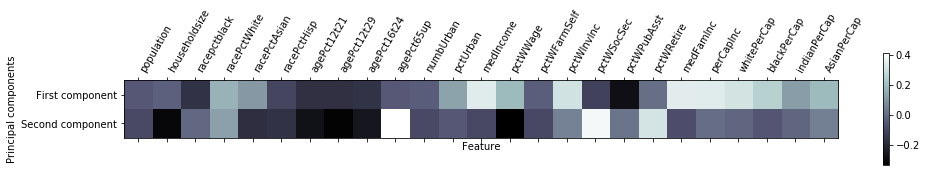

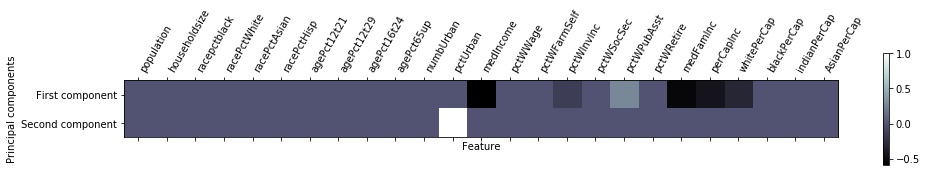

In [68]:
plt.matshow(pca.components_, cmap='bone') 
plt.yticks([0,1], ["First component", "Second component"]) 
plt.colorbar() 
plt.xticks(range(len(data.columns.values[0:25])),           
                          data.columns.values[0:25], rotation=60, ha='left') 
plt.xlabel("Feature") 
plt.ylabel("Principal components")

plt.matshow(spca.components_, cmap='bone') 
plt.yticks([0,1], ["First component", "Second component"]) 
plt.colorbar() 
plt.xticks(range(len(data.columns.values[0:25])),           
                          data.columns.values[0:25], rotation=60, ha='left') 
plt.xlabel("Feature") 
plt.ylabel("Principal components")

PCA and Sparse PCA identify some of the same main features. Both medIncome and medFamInc are recognized as high predictors of crime, for example. 